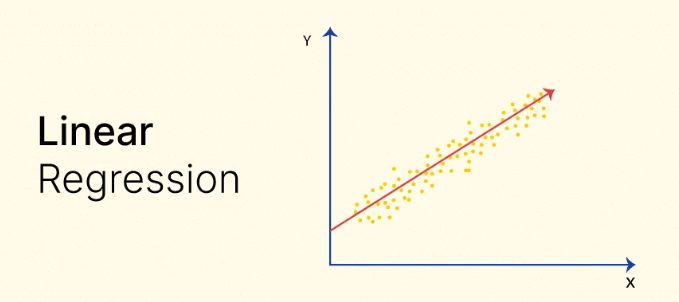
- Linear regression is a supervised learning algorithm used for predicting a continuous target variable based on one or more input features. 
- The goal of linear regression is to find the best-fitting line that minimizes the sum of the squared distances between the actual and predicted target values. 


The equation for a linear regression model is: \
y = a0 + a1 * x1 + a2 * x2 + ... + an * xn 

where y is the predicted target value, x1, x2, ..., xn are the input features, and a0, a1, a2, ..., an are the coefficients of the model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 * x + 1 + np.random.rand(100, 1)

In [2]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model
model = LinearRegression()
model.fit(x, y)

LinearRegression()

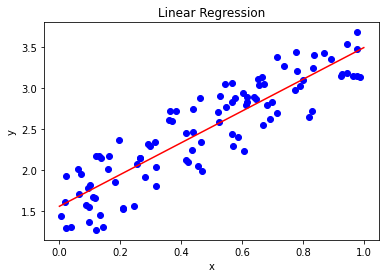

In [3]:
# Plot the original data
plt.scatter(x, y, color='blue')

# Plot the regression line
x_new = np.linspace(0, 1, 100).reshape(-1, 1)
y_new = model.predict(x_new)
plt.plot(x_new, y_new, color='red')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

# Performance Matrices

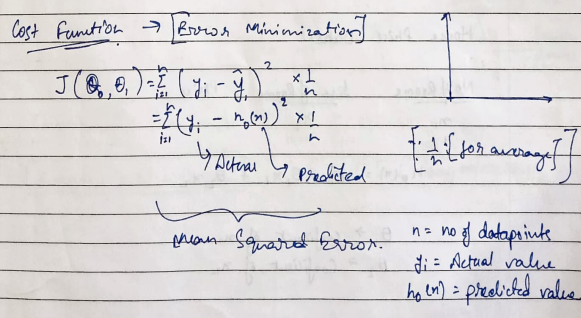

In [4]:
# Predict target values for the training data
y_pred = model.predict(x)

# Calculate the Mean Squared Error (MSE)
mse = np.mean((y - y_pred)**2)
print("MSE:", mse)

MSE: 0.07623324582875006


In [5]:
# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.2761036867351649


In [6]:
# Calculate the Mean Absolute Error (MAE)
mae = np.mean(np.abs(y - y_pred))
print("MAE:", mae)

MAE: 0.2370949851119031


In [7]:
# Calculate the R-squared score
r2 = model.score(x, y)
print("R-squared:", r2)

R-squared: 0.8034942875609504


In [8]:
# Calculate the adjusted R-squared score
r2 = model.score(x, y)
n = len(x)
p = x.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.8014891272299397


# Lasso, Ridge and Elastic Net

In [9]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error

# Generate a sample dataset
X, y = make_regression(n_samples=100, n_features=20, noise=0.5, random_state=42)

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print("Lasso MSE:", lasso_mse)

Lasso MSE: 0.4382807298719273


In [12]:
# Ridge Regression with solver='svd'
ridge_model = Ridge(alpha=0.1, solver='svd')
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print("Ridge MSE:", ridge_mse)


Ridge MSE: 0.4502924773146545


In [13]:
# Elastic Net Regression
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # You can adjust alpha and l1_ratio parameters
elastic_net_model.fit(X_train, y_train)
elastic_net_predictions = elastic_net_model.predict(X_test)
elastic_net_mse = mean_squared_error(y_test, elastic_net_predictions)
print("Elastic Net MSE:", elastic_net_mse)


Elastic Net MSE: 73.58931980740543


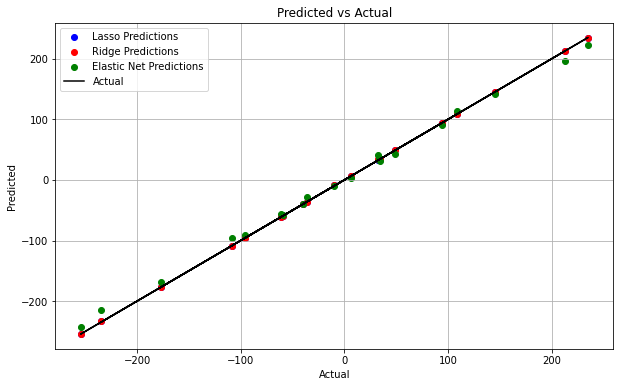

In [14]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_predictions, color='blue', label='Lasso Predictions')
plt.scatter(y_test, ridge_predictions, color='red', label='Ridge Predictions')
plt.scatter(y_test, elastic_net_predictions, color='green', label='Elastic Net Predictions')
plt.plot(y_test, y_test, color='black', linestyle='-', label='Actual')
plt.title('Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()